In [ ]:
import os
os.chdir('/content/drive/MyDrive/Tensorflow Advance/Practice/psc')
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.model_selection import train_test_split
print("Version of tensorflow is : ",tf.__version__)

In [ ]:
df = pd.read_csv("data.csv" , error_bad_lines=False)
# df.head()

In [7]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


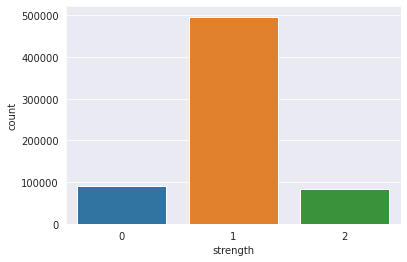

In [8]:
sns.countplot(df['strength'])

In [9]:
print("Shape of data : ",df.shape)

Shape of data :  (669640, 2)


In [10]:
data = pd.DataFrame()

In [17]:
data['length'] = df['password'].apply(lambda x : len(str(x)))

In [20]:
def count_letter_digit(s , a ,b):
    count = 0
    for i in s:
        if i>=a and i<=b:
            count += 1
    return count

In [22]:
print("No of cap : ",count_letter_digit("Ankit Podder 8114" , 'A' , 'Z'))
print("No of sma : ",count_letter_digit("Ankit Podder 8114" , 'a' , 'z'))
print("No of digit : ",count_letter_digit("Ankit Podder 8114" , '0' , '9'))

No of cap :  2
No of sma :  9
No of digit :  4


In [23]:
data['capital'] = df['password'].apply(lambda x : count_letter_digit(str(x) , 'A' , 'Z'))
data['small'] = df['password'].apply(lambda x : count_letter_digit(str(x) , 'a' , 'z'))
data['digit'] = df['password'].apply(lambda x : count_letter_digit(str(x) , '0' , '9'))

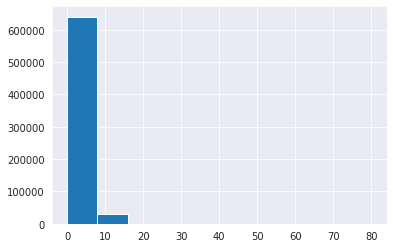

In [28]:
data['capital'].hist()

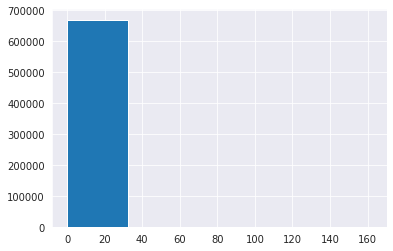

In [30]:
data['small'].hist(bins=5)

In [31]:
def no_special_char(s):
    s = str(s)
    count = 0
    for i in s:
        if (not (i>='A' and i<='Z'))  and (not (i>='a' and i<='z')) and (not (i>='0' and i<='9')):
            count += 1
    return count

In [35]:
data['special_char'] = df['password'].apply(no_special_char)

In [36]:
data.head()

,length,capital,small,digit,special_char
0,8,0,4,4,0
1,8,0,4,4,0
2,9,0,7,2,0
3,8,0,5,3,0
4,11,0,10,1,0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(data, df['strength'], test_size=0.25, random_state=100)
X_train = X_train.values
print("Shape of X_train : ",X_train.shape)
X_test  = X_test.values
print("Shape of X_test : ",X_test.shape)
y_train = y_train.values
y_train  = tf.keras.utils.to_categorical(y_train)
print("Shape of y_train : ",y_train.shape)
y_test  = y_test.values
y_test  = tf.keras.utils.to_categorical(y_test)
print("Shape of y_test : ",y_test.shape)

Shape of X_train :  (502230, 5)
Shape of X_test :  (167410, 5)
Shape of y_train :  (502230, 3)
Shape of y_test :  (167410, 3)


In [60]:
def get_basic_model():
    inp = tf.keras.layers.Input(shape=(5,))
    l1  = tf.keras.layers.Dense(32 , activation=tf.nn.relu)(inp)
    l2  = tf.keras.layers.Dense(64 , activation = tf.nn.relu)(l1)
    output = tf.keras.layers.Dense(3 , activation=tf.nn.softmax)(l2)
    model = tf.keras.Model(inputs = inp , outputs = output)
    model.compile(loss = tf.keras.losses.categorical_crossentropy , optimizer = 'adam' , metrics = ['acc'])
    return model

In [61]:
model = get_basic_model()
model.summary()
his = model.fit(X_train , y_train , epochs=500 , batch_size=128 , validation_data=(X_test , y_test), verbose=0)

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                192       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 195       
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.evaluate(X_train , y_train)

15695/15695 [==============================] - 11s 702us/step - loss: 2.1715e-06 - acc: 1.0000


[2.171524783989298e-06, 1.0]

In [63]:
model.evaluate(X_test , y_test)

5232/5232 [==============================] - 4s 709us/step - loss: 2.9885e-06 - acc: 1.0000


[2.9885418371122796e-06, 1.0]

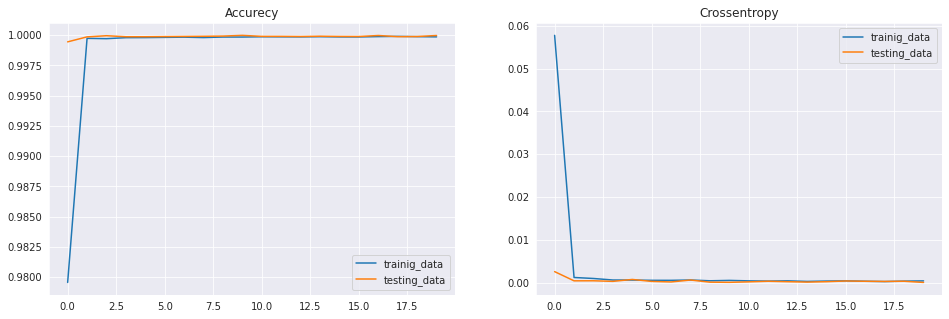

In [66]:
_ , ax = plt.subplots(1 , 2 , figsize = (16 , 5))
ax[0].plot(his.history['acc'][:20] , label="trainig_data")
ax[0].plot(his.history['val_acc'][:20], label = "testing_data")
ax[0].set_title("Accurecy")
ax[0].legend()

ax[1].plot(his.history['loss'][:20] , label="trainig_data")
ax[1].plot(his.history['val_loss'][:20] , label = "testing_data")
ax[1].set_title("Crossentropy")
ax[1].legend()

In [85]:
def pred(passwords): #List of password
    a = []
    for password in passwords:
        li = []
        li.append(len(str(password)))
        li.append(count_letter_digit(str(password) , "A" , 'Z'))
        li.append(count_letter_digit(str(password) , "a" , 'z'))
        li.append(count_letter_digit(str(password) , "0" , '9'))
        li.append(no_special_char(str(password)))
        a.append(li)
    a = np.array(a)
    return np.argmax(model.predict(a) , axis = 1)

In [90]:
class_name = ['Easy' , 'Hard' , 'Very Hard']
passwords = [1235 , "ANkit@5895" , "Ankit:()Podder@paul"]
a = pred(passwords)
for i in range(len(a)):
    print("Strength of the ' %20s ' is : %s"%( passwords[i] , class_name[a[i]] ))

Strength of the '                 1235 ' is : Easy
Strength of the '           ANkit@5895 ' is : Hard
Strength of the '  Ankit:()Podder@paul ' is : Very Hard


In [91]:
from sklearn.metrics import classification_report

In [94]:
print("Classification report for training data:\n=====================================")
print(classification_report(np.argmax(y_train , axis=1) , np.argmax(model.predict(X_train) , axis=1) ))

Classification report for training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67413
           1       1.00      1.00      1.00    372753
           2       1.00      1.00      1.00     62064

    accuracy                           1.00    502230
   macro avg       1.00      1.00      1.00    502230
weighted avg       1.00      1.00      1.00    502230



In [95]:
print("Classification report for testing data:\n=====================================")
print(classification_report(np.argmax(y_test , axis=1) , np.argmax(model.predict(X_test) , axis=1) ))

Classification report for testing data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22289
           1       1.00      1.00      1.00    124048
           2       1.00      1.00      1.00     21073

    accuracy                           1.00    167410
   macro avg       1.00      1.00      1.00    167410
weighted avg       1.00      1.00      1.00    167410

